# Groepsopdracht regressie

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


# Wat is het probleem?

Op basis van de dataset over de Iris bloemen moet door middel van regressie een voorspelling van een datapunt worden gemaakt.
Uiteindelijk moet de lengte van een petal worden voorspelt.

Onderzoeksvraag: Kan de petal length worden voorspeld door middel van regressie?

# Data verzamelen

In [225]:
# Load the data
data = pd.read_csv('Iris_with_outliers.csv')

# Species omzetten naar 1-3
data['Species'] = data['Species'].replace('Iris-setosa', 1)
data['Species'] = data['Species'].replace('Iris-versicolor', 2)
data['Species'] = data['Species'].replace('Iris-virginica', 3)

display(data.head())

C:\Users\Mika\AppData\Local\Temp\ipykernel_10852\1282667181.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace('Iris-virginica', 3)


,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,1
1,1,1,4.7,3.2,1.6,0.2,1
2,2,2,4.9,3.1,1.5,0.1,1
3,3,3,4.4,2.9,1.4,0.2,1
4,4,4,5.0,3.4,1.5,0.2,1


# Data visualisatie

Unnamed: 0       86.000000
Id               86.000000
SepalLengthCm     5.834118
SepalWidthCm      3.068605
PetalLengthCm     3.718935
PetalWidthCm      1.171345
Species           1.976879
dtype: float64
     Unnamed: 0   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
20           20   20            5.8           4.0            1.2   
32           32   32            5.2           4.1            1.5   
33           33   33            5.5           4.2            1.4   
56           56   56            5.7           4.4            1.5   
90           90   90            5.0           2.0            3.5   
91           91   91            5.7           4.4            1.5   
115         115  115            8.0           2.9            4.3   
121         121  121            7.6           3.0            6.6   
125         125  125            7.7           3.8            6.7   
136         136  136            7.7           2.8            6.7   
140         140  140            7.7           2.

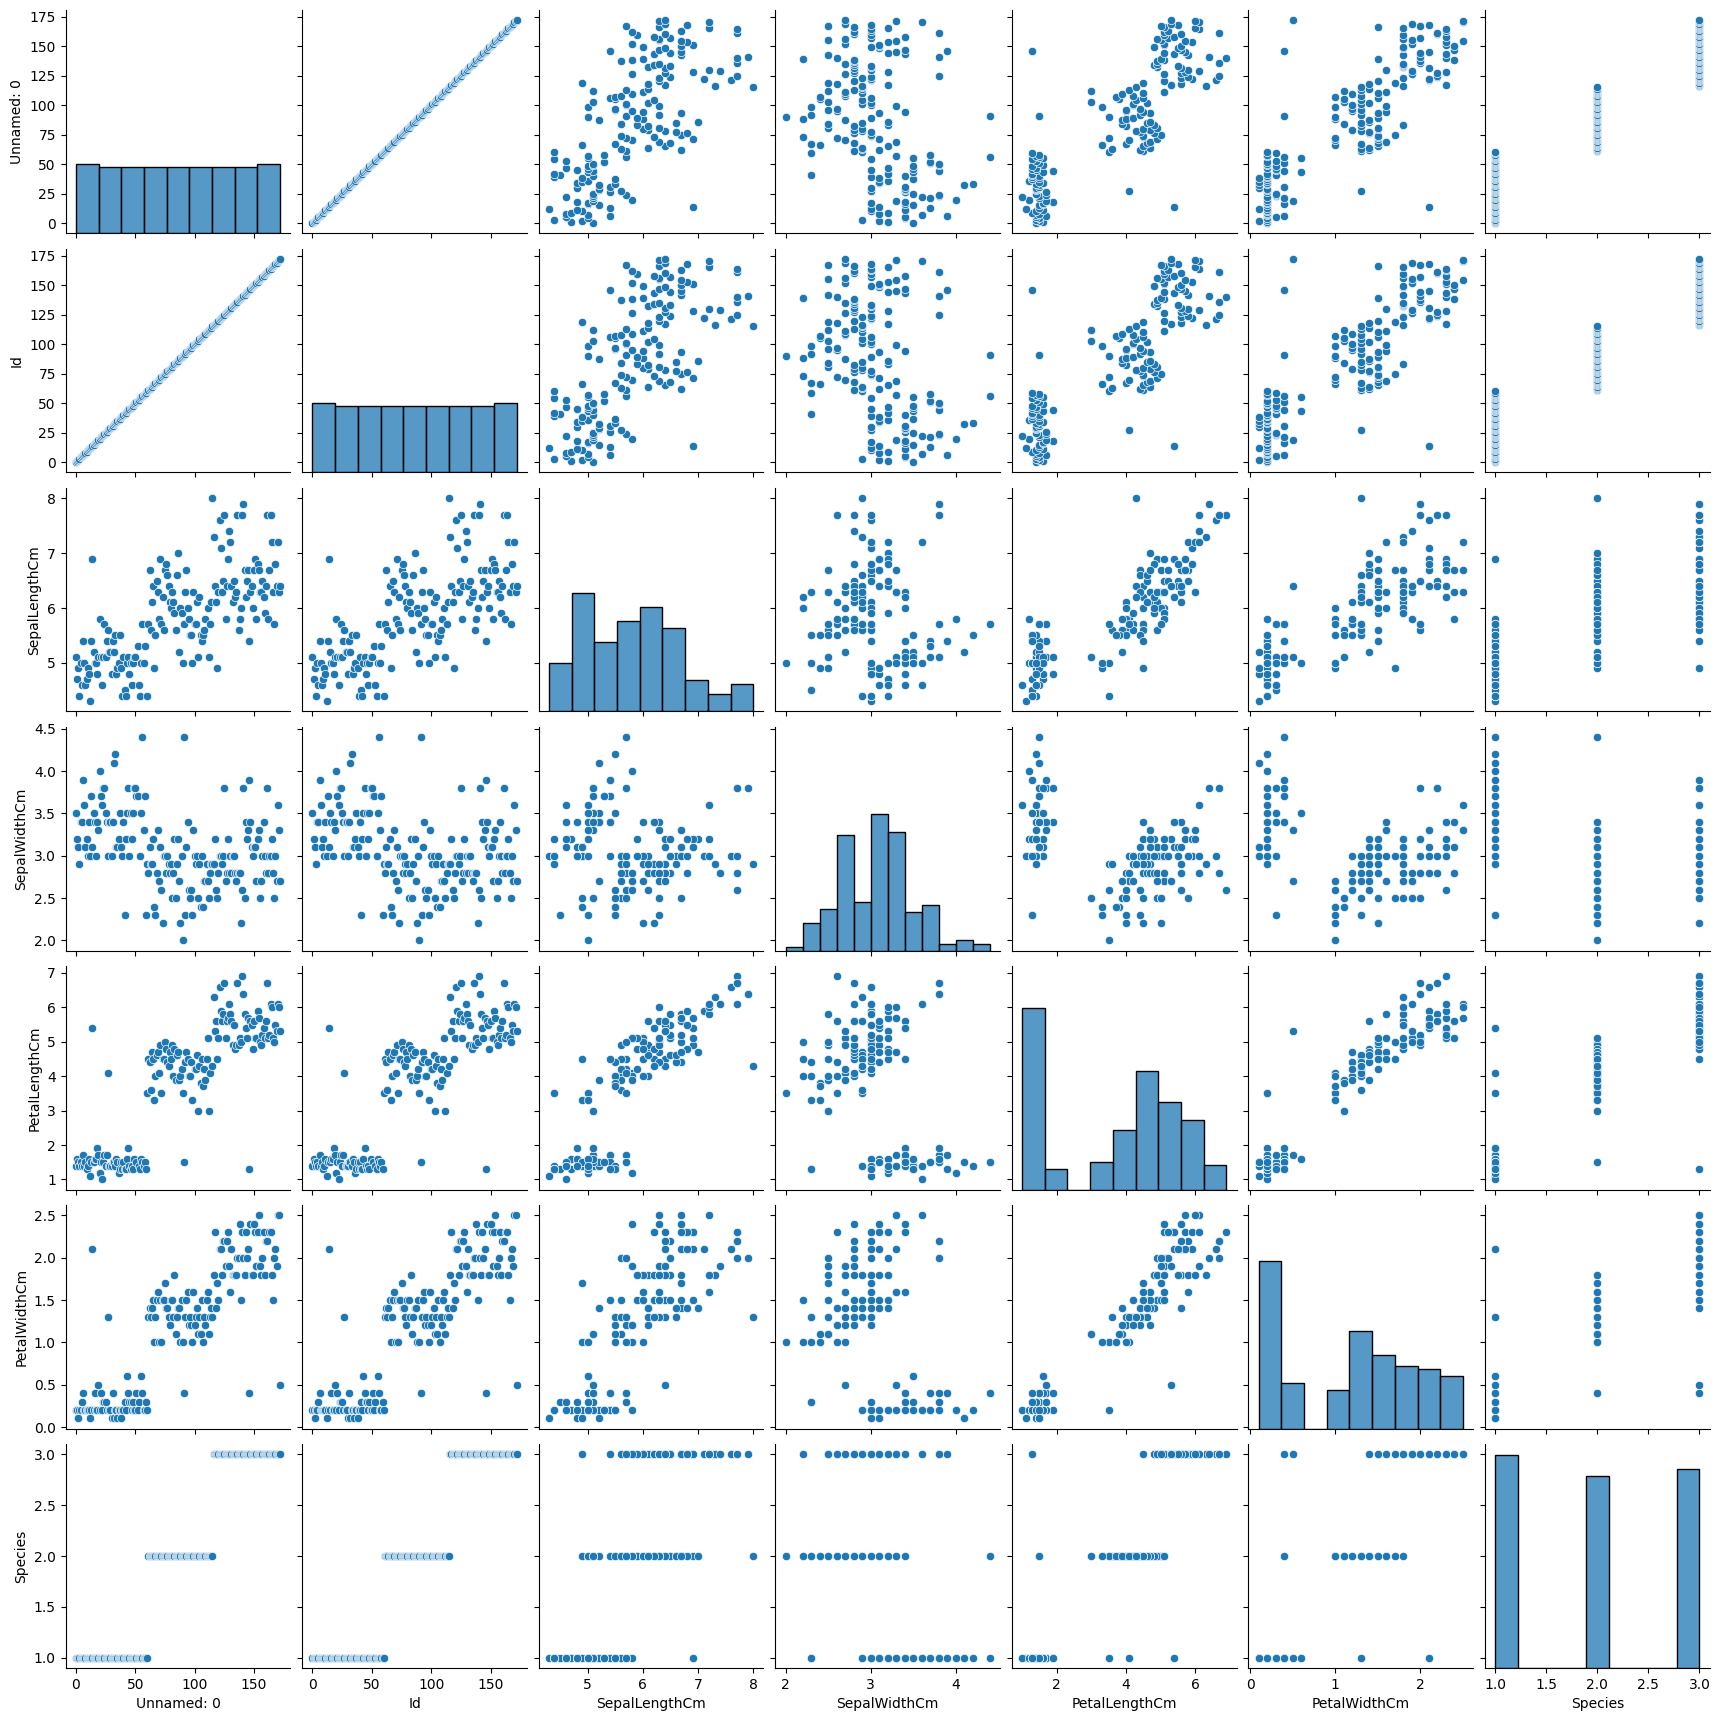

In [226]:
# Calculate means, Standarddeviations and outliers
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(means)
print(outliers)
print(stds)

# Visualize the dataset
sns.pairplot(data)
plt.show()

# Data opschonen en voorbereiden

In [227]:
# Search NaN and 0 values
print(data.isnull().sum())
print((data == 0).sum())

# Replace NaN and 0 values
data = data.replace(0, np.nan)
data = data.fillna(data.mean())

# Remove the unnamed and ID columns
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Id', axis=1)

# Find outliers and remove them
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(outliers)
data = data.drop(outliers.index)


Unnamed: 0       0
Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64
Unnamed: 0       1
Id               1
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
20             5.8           4.0            1.2           0.2        1
32             5.2           4.1            1.5           0.1        1
33             5.5           4.2            1.4           0.2        1
56             5.7           4.4            1.5           0.4        1
90             5.0           2.0            3.5           1.0        2
91             5.7           4.4            1.5           0.4        2
115            8.0           2.9            4.3           1.3        2
121            7.6           3.0            6.6           2.1        3
125            7.7           3.8            6.7           2.2        

In [228]:
display(data.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.7,3.2,1.6,0.2,1
2,4.9,3.1,1.5,0.1,1
3,4.4,2.9,1.4,0.2,1
4,5.0,3.4,1.5,0.2,1


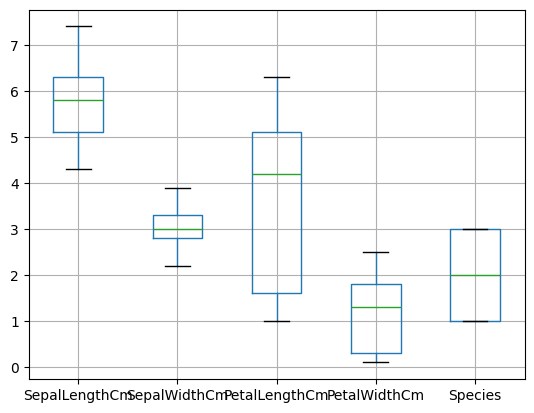

In [229]:
data.boxplot()
plt.show()

In [230]:
# Normalize the data (excluding the target 'PetalLenghtCm')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('PetalLengthCm', axis=1))

# Data voorbereiden voor een eerlijke vergelijking

In [231]:
# Target
y = data['PetalLengthCm'].astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Selecteer het linear regression model

In [232]:
# Select linear regression model
model = LinearRegression()


# Train en test het linear regression model

In [233]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het linear regression model

Mean Squared Error: 0.3306889665799256
R2 score: 0.8836738228176422


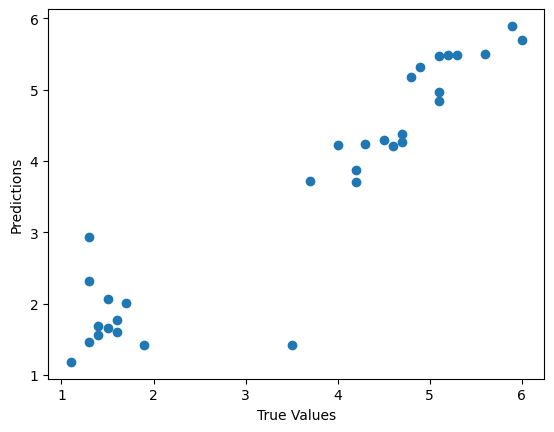

Train score: 0.9279913563773429
Test score: 0.8836738228176422


In [234]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Selecteer het ridge regression model

**Note:** <br>
De alpha parameter is toegevoegd nadat we de beste alpha waarde hebben gevonden. De training score is hierdoor verslechterd, maar de test score is hierdoor verbeterd. Het model is dus minder gaan overfitten en is op nieuwe data accurater geworden.

In [235]:
# Select ridge regression model
model = Ridge(alpha=9.01)

# Train en test het ridge regression model

In [236]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het ridge regression model

Mean Squared Error: 0.32733398437450834
R2 score: 0.8848540020613204


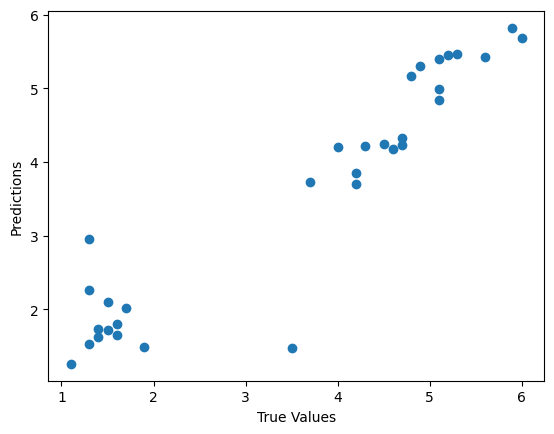

Train score: 0.9269419621370772
Test score: 0.8848540020613204


In [237]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Parameters testen voor ridge regression

In [238]:
# Try to find the best parameters for the ridge model
param_grid = {'alpha': np.arange(0, 10, 0.01)}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('Best alpha:', grid.best_params_)

Best alpha: {'alpha': np.float64(9.01)}


# Selecteer het random forest regression model

**Note:** <br>
Ik heb uitgezocht wat de optimale parameters zijn voor dit model. Hierdoor is de test en train score verbeterd.

In [239]:
# Select random forest model
model = RandomForestRegressor(n_estimators=28, max_depth=8)

# Train en test het random forest regression model

In [240]:
# Train the model
model.fit(X_train, y_train)

# Predict the target
y_pred = model.predict(X_test)

# Analyseer en evalueer het random forest regression model

Mean Squared Error: 0.32104555444926397
R2 score: 0.8870660777203551


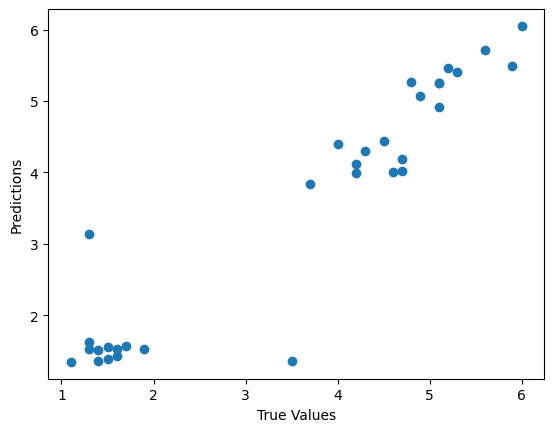

Train score: 0.975885316260865
Test score: 0.8870660777203551


In [241]:
# Analyse the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

# Test the accuracy and precision of the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Check for over/underfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

# Parameters testen voor random forest regression

In [242]:
# Try to find the best parameters for the random forest model
param_grid = {'n_estimators': np.arange(1, 100, 1), 'max_depth': np.arange(1, 10, 1)}
grid = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, random_state=42)
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

Best parameters: {'n_estimators': np.int64(37), 'max_depth': np.int64(4)}


# Vergelijking van de modellen

| Model         | Train Score            | Test Score             |
|---------------|------------------------|------------------------|
| Linear        | 0.9279913563773429     | 0.8836738228176422     |
| Ridge         | 0.9269419621370772     | 0.8848540020613204     |
| Random Forest | 0.975885316260865      | 0.8870660777203551     |

Het Random Forest model is het meeste geoverfit, terwijl de test score maar marginaal beter is dan de andere twee modellen. Ridge heeft een net iets betere test score dan linear, terwijl de overfitting bij ridge iets minder is. Voor deze dataset zouden wij daarom het ridge model kiezen.

# Conclusie
Door middel van het Ridge regressie model kunnen wij met 88.48% zekerheid de petal length voorspellen op basis van de andere data in de dataset.